In [50]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

In [3]:
#загрузка датасета
df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
#вывод информации о датасете, проверка на наличие пропусков
#пропуски есть по признаку LifeSquare и Healthcare_1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
#вывод статистических данных
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [6]:
#визуализация количественных признаков
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.drop('Id', axis=1, inplace=True)
df_num_features.drop('DistrictId', axis=1, inplace=True)

array([[<AxesSubplot:title={'center':'Rooms'}>,
        <AxesSubplot:title={'center':'Square'}>,
        <AxesSubplot:title={'center':'LifeSquare'}>,
        <AxesSubplot:title={'center':'KitchenSquare'}>],
       [<AxesSubplot:title={'center':'Floor'}>,
        <AxesSubplot:title={'center':'HouseFloor'}>,
        <AxesSubplot:title={'center':'HouseYear'}>,
        <AxesSubplot:title={'center':'Ecology_1'}>],
       [<AxesSubplot:title={'center':'Social_1'}>,
        <AxesSubplot:title={'center':'Social_2'}>,
        <AxesSubplot:title={'center':'Social_3'}>,
        <AxesSubplot:title={'center':'Healthcare_1'}>],
       [<AxesSubplot:title={'center':'Helthcare_2'}>,
        <AxesSubplot:title={'center':'Shops_1'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

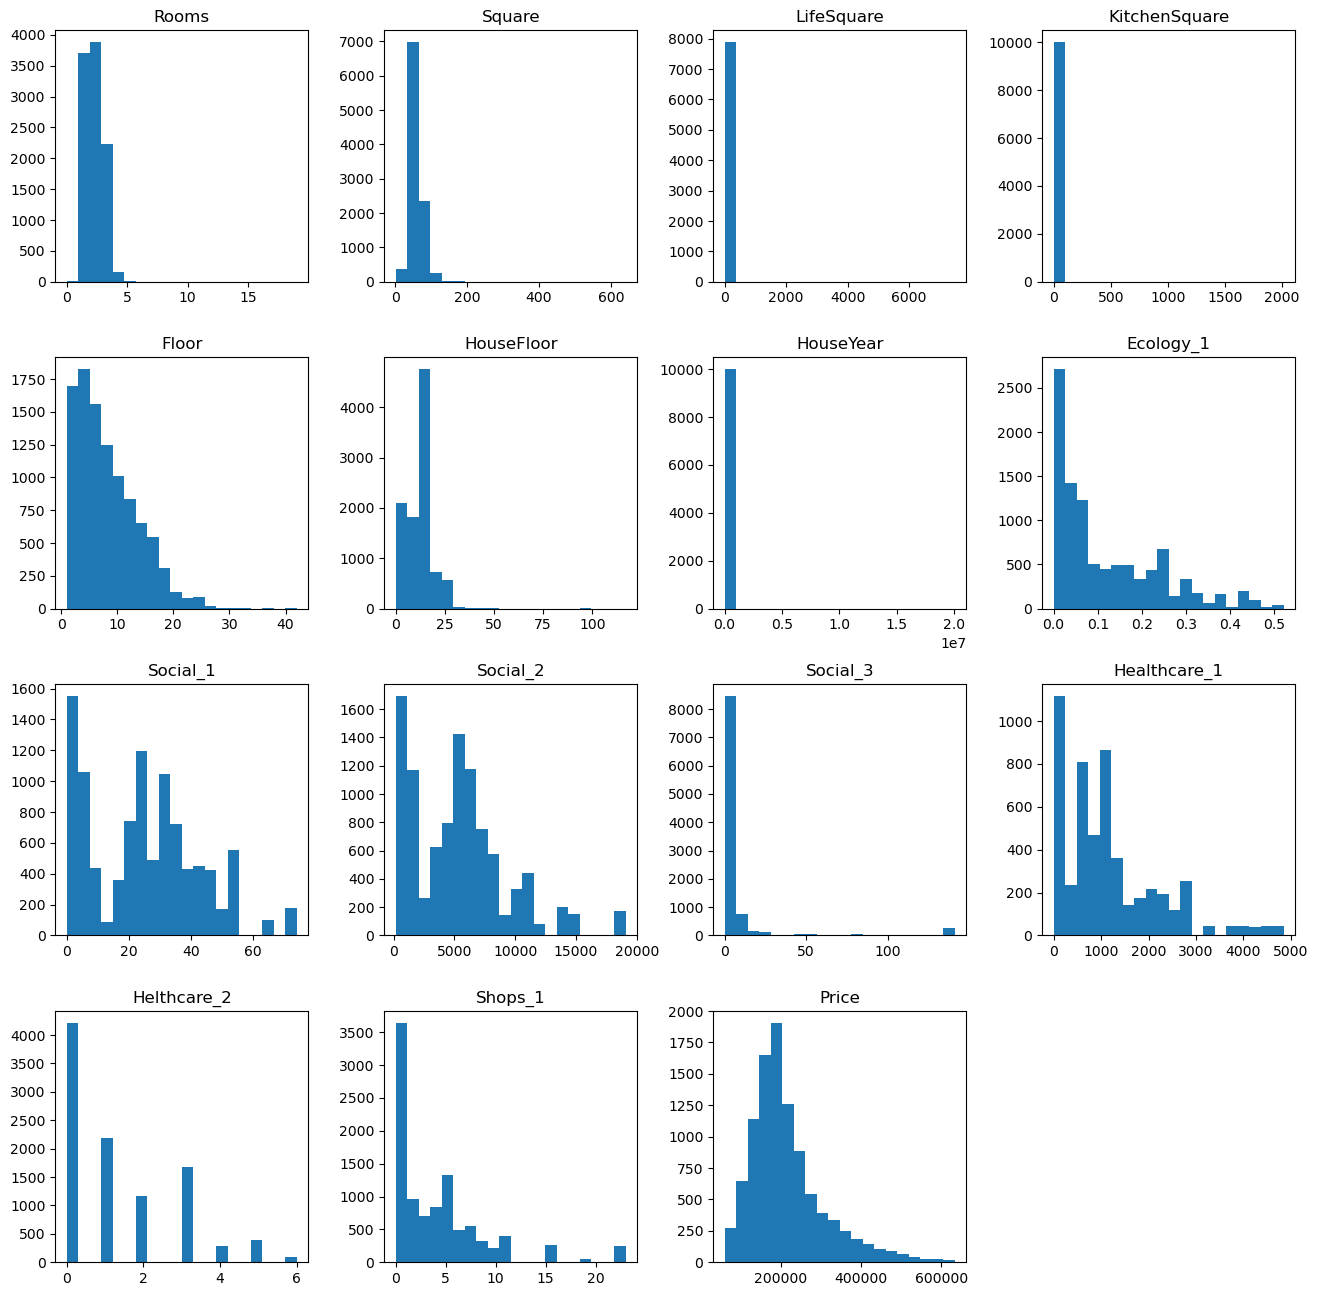

In [7]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False)

In [8]:
#Начинаем с удаления выбросов и некорректных значений в признаке KitchenSquare

In [9]:
#Начинаем с удаления выбросов и некорректных значений в признаке KitchenSquare. Добавим столбец для обозначения замены.
df['KitchSq_outl'] = 0
df.loc[(df['KitchenSquare'] > 50)|(df['KitchenSquare'] > df['Square']), 'KitchSq_outl'] = 1

df.loc[(df['KitchenSquare'] > 50)|(df['KitchenSquare'] > df['Square']), 'KitchenSquare'] = df['KitchenSquare'].median()

In [10]:
df['KitchenSquare'].describe()

count    10000.000000
mean         5.747400
std          4.137669
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max         48.000000
Name: KitchenSquare, dtype: float64

In [11]:
df['Square'].value_counts(bins=5)

(0.496, 129.123]      9946
(129.123, 257.108]      50
(513.08, 641.065]        2
(257.108, 385.094]       1
(385.094, 513.08]        1
Name: Square, dtype: int64

In [12]:
# Просмотрим объекты с площадью больше 260. Предполагаем, что это ошибки.
df.loc[df['Square'] > 260]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,KitchSq_outl
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,...,A,31,7010,5,4508.0,3,7,B,455264.882666,0
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,...,B,25,5648,1,30.0,2,4,B,187717.242538,0
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,...,B,26,3889,6,705.0,3,6,B,90470.430830,0
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,...,B,22,6398,141,1046.0,3,23,B,133529.681562,0


In [13]:
#замена площади >300 (т.к. меньше 300 похоже на реальное значение) на медиану
df['Square_outl'] = 0
df.loc[df['Square'] > 300, 'Square_outl'] = 1

df.loc[df['Square'] > 300, 'Square'] = df['Square'].median()

In [14]:
#проверка замены
df.loc[df['Square'] > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,KitchSq_outl,Square_outl


In [15]:
#проверка на выбросы в столбце LifeSquare. Зададим значение > 300, т.к. данную отсечку мы выбрали для столбца Square
df.loc[df['LifeSquare'] > 300]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,KitchSq_outl,Square_outl
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,...,2,469,0,NaN,0,0,B,217357.492366,0,0
4690,2307,102,1.0,52.513310,410.639749,10.0,4,4.0,2016,0.238617,...,26,3889,6,705.0,3,6,B,90470.430830,0,1
6977,11602,30,2.0,52.513310,638.163193,10.0,20,19.0,2019,0.000078,...,22,6398,141,1046.0,3,23,B,133529.681562,0,1
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,...,52,11217,1,2300.0,1,7,B,394253.299978,0,0


In [16]:
#проверка и дальнейшее избавление от некорректных значений в столбце LifeSquare
df.loc[df['Square'] < df['LifeSquare']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,KitchSq_outl,Square_outl
28,8054,23,1.0,42.530043,43.967759,1.0,3,9.0,2014,0.034656,...,0,168,0,NaN,0,0,B,95338.198549,0,0
44,10521,38,3.0,104.211396,106.340403,0.0,20,0.0,2017,0.060753,...,15,2787,2,520.0,0,7,B,435462.048070,0,0
52,2301,1,2.0,61.400054,65.224603,0.0,17,22.0,2016,0.007122,...,1,264,0,NaN,0,1,B,199215.452229,0,0
123,8753,25,3.0,85.952306,89.803753,1.0,4,3.0,2017,0.069753,...,53,13670,4,NaN,1,11,B,309688.592681,0,0
153,9870,62,1.0,51.831473,53.491301,1.0,5,1.0,2015,0.072158,...,2,629,1,NaN,0,0,A,131797.472284,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,41,30,2.0,59.015896,59.439082,12.0,5,5.0,2016,0.000078,...,22,6398,141,1046.0,3,23,B,126281.142781,0,0
9889,12918,23,2.0,51.440463,53.134243,6.0,3,17.0,2017,0.005767,...,1,388,0,NaN,0,0,B,88150.012510,1,0
9895,2737,27,3.0,123.430072,125.806981,6.0,5,10.0,2015,0.017647,...,2,469,0,NaN,0,0,B,234194.837047,1,0
9902,14001,73,1.0,44.098768,44.267551,1.0,7,24.0,2014,0.042032,...,37,6856,84,1940.0,2,5,B,381937.404161,0,0


In [17]:
df['LifeSq_outl'] = 0
df.loc[(df['LifeSquare'] > df['Square'])|(df['LifeSquare'].isna()), 'LifeSq_outl'] = 1

df.loc[(df['LifeSquare'] > df['Square'])|(df['LifeSquare'].isna()), 'LifeSquare'] = df['Square'] - df['KitchenSquare']
df.loc[(df['LifeSquare'] > df['Square'])|(df['LifeSquare'].isna())]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,KitchSq_outl,Square_outl,LifeSq_outl


In [18]:
df['LifeSquare'].isna().sum()

0

In [19]:
#просмотрим выбивающиеся значения комнат
df.loc[(df['Rooms'] > 5)|(df['Rooms'] == 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,KitchSq_outl,Square_outl,LifeSq_outl
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,...,19083,2,NaN,5,15,B,317265.323792,0,0,0
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,...,3097,0,NaN,0,0,B,268394.744389,0,0,0
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,...,264,0,NaN,0,1,B,78364.616704,0,0,0
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,...,1892,0,NaN,0,1,B,302211.260887,0,0,0
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,...,10573,1,1322.0,3,8,B,229661.964416,0,0,0
2269,7317,27,0.0,41.790881,41.790881,0.0,13,0.0,1977,0.211401,...,1892,0,NaN,0,1,B,98129.976788,0,0,1
3911,770,28,0.0,49.483501,49.483501,0.0,16,0.0,2015,0.118537,...,6207,1,1183.0,1,0,B,217009.338463,0,0,1
4366,456,6,0.0,81.491446,81.491446,0.0,4,0.0,1977,0.243205,...,1564,0,540.0,0,0,B,212864.799112,0,0,1
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,...,469,0,NaN,0,0,B,126596.941798,0,0,0
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,...,8429,3,NaN,3,9,B,158998.110646,0,0,0


In [20]:
#добавим новый столбец для обозначения замен, заменим значения 0 на 1, а те, что больше 5 - на медиану
df['Rooms_outl'] = 0
df.loc[(df['Rooms'] > 5)|(df['Rooms'] == 0), 'Rooms_outl'] = 1

df.loc[df['Rooms'] > 5, 'Rooms'] = df['Rooms'].median()
df.loc[df['Rooms'] == 0, 'Rooms'] = 1

df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,KitchSq_outl,Square_outl,LifeSq_outl,Rooms_outl
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,NaN,0,11,B,184966.930730,0,0,0,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,240.0,1,16,B,300009.450063,0,0,0,0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,229.0,1,3,B,220925.908524,0,0,0,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,3,1084.0,0,5,B,175616.227217,0,0,0,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2078.0,2,4,B,150226.531644,0,0,0,0


In [21]:
#проверка
df.loc[(df['Rooms'] > 5)|(df['Rooms'] == 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,KitchSq_outl,Square_outl,LifeSq_outl,Rooms_outl


In [22]:
# заменим нулевые значения этажности домов на медиану
df['HouseFloor_outl'] = 0
df.loc[df['HouseFloor'] == 0, 'HouseFloor_outl'] = 1

df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()

In [23]:
# проверим есть ли и сколько значений этажа квартиры больше этажности дома
df.loc[df['Floor'] > df['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,KitchSq_outl,Square_outl,LifeSq_outl,Rooms_outl,HouseFloor_outl
7,11993,74,2.0,80.312926,80.312926,0.0,14,13.0,1977,0.075779,...,NaN,0,2,B,221244.156664,0,0,1,0,1
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,...,NaN,0,0,A,140647.565937,0,0,0,0,0
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,...,NaN,0,0,B,117000.381287,0,0,0,0,0
21,11935,27,2.0,64.711835,63.711835,1.0,15,1.0,1977,0.211401,...,NaN,0,1,B,127200.026511,0,0,1,0,0
26,4378,27,3.0,106.958871,0.641822,0.0,17,13.0,2018,0.072158,...,NaN,0,0,A,337299.867936,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3.0,64.074977,47.633428,6.0,11,9.0,1983,0.371149,...,750.0,2,5,B,226434.880156,0,0,0,0,0
9985,16159,27,1.0,38.968338,37.968338,1.0,10,1.0,1977,0.211401,...,NaN,0,1,B,95529.569405,0,0,1,0,0
9989,4145,96,3.0,90.055233,47.860231,11.0,26,24.0,2005,0.041116,...,NaN,1,4,B,441108.911237,0,0,0,0,0
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,...,1937.0,3,2,B,212883.501504,0,0,0,0,0


In [24]:
# заменим некорректные значения этажа на значение этажности или 1й этаж (для нулевых)
df['Floor_outl'] = 0
df.loc[(df['Floor'] > df['HouseFloor'])|(df['Floor'] == 0), 'Floor_outl'] = 1

df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df['HouseFloor']
df.loc[df['Floor'] == 0, 'Floor'] = 1

In [25]:
df.loc[(df['Floor'] > df['HouseFloor'])|(df['Floor'] == 0)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,KitchSq_outl,Square_outl,LifeSq_outl,Rooms_outl,HouseFloor_outl,Floor_outl


In [26]:
#значения года постройки больше текущего заменим на медиану
df['HouseYr_outl'] = 0
df.loc[df['HouseYear'] > 2023, 'HouseYr_outl'] = 1

df.loc[df['HouseYear'] > 2023, 'HouseYear'] = df['HouseYear'].median()

Распределение признака Social_3 вызывает сомнения. 
Но непонятно,что это за признак и что на него влияет. Поэтому оставляем без изменений.
Остальные числовые признаки не трогаем, кроме HealthCare_1 - в нем отсутствует половина данных. Лучше убрать столбец целиком и не брать в расчет.

In [27]:
df.drop('Healthcare_1', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               10000 non-null  int64  
 1   DistrictId       10000 non-null  int64  
 2   Rooms            10000 non-null  float64
 3   Square           10000 non-null  float64
 4   LifeSquare       10000 non-null  float64
 5   KitchenSquare    10000 non-null  float64
 6   Floor            10000 non-null  int64  
 7   HouseFloor       10000 non-null  float64
 8   HouseYear        10000 non-null  int64  
 9   Ecology_1        10000 non-null  float64
 10  Ecology_2        10000 non-null  object 
 11  Ecology_3        10000 non-null  object 
 12  Social_1         10000 non-null  int64  
 13  Social_2         10000 non-null  int64  
 14  Social_3         10000 non-null  int64  
 15  Helthcare_2      10000 non-null  int64  
 16  Shops_1          10000 non-null  int64  
 17  Shops_2      

In [28]:
# просмотрим значения в признаках типа object (Ecology_2, Ecology_3, Shops_2)
df['Ecology_2'].value_counts(), df['Ecology_3'].value_counts(), df['Shops_2'].value_counts()

(B    9903
 A      97
 Name: Ecology_2, dtype: int64,
 B    9725
 A     275
 Name: Ecology_3, dtype: int64,
 B    9175
 A     825
 Name: Shops_2, dtype: int64)

In [29]:
# заменим признаки со значениями типа object (Ecology_2, Ecology_3, Shops_2) на dummy-переменные
df['Ecology_2_A1_B0'] = 0
df.loc[df['Ecology_2'] == 'A', 'Ecology_2_A1_B0'] = 1

df['Ecology_3_A1_B0'] = 0
df.loc[df['Ecology_3'] == 'A', 'Ecology_3_A1_B0'] = 1

df['Shops_2_A1_B0'] = 0
df.loc[df['Shops_2'] == 'A', 'Shops_2_A1_B0'] = 1

df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,KitchSq_outl,Square_outl,LifeSq_outl,Rooms_outl,HouseFloor_outl,Floor_outl,HouseYr_outl,Ecology_2_A1_B0,Ecology_3_A1_B0,Shops_2_A1_B0
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,0,0,0,0,0,0,0,0,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,0,0,0,0,0,0,0,0,0,0
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,0,0,0,0,0,0,0,0,0
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,0,0,0,0,0,0,0,0,0
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# узнаем сколько всего районов представлено в датасете,  
# создадим новый признак, демонстрирующий среднюю жилья стоимость по району
df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
207      1
117      1
174      1
205      1
209      1
Name: DistrictId, Length: 205, dtype: int64

In [31]:
med_price_by_district = df.groupby(['DistrictId'], as_index=False).agg({'Price':'median'})\
                .rename(columns={'Price':'MedPriceByDistr'})
med_price_by_district.head()

,DistrictId,MedPriceByDistr
0,0,165963.054142
1,1,183663.443595
2,2,208539.501373
3,3,169094.013281
4,4,278639.482329


In [32]:
df = df.merge(med_price_by_district, on=['DistrictId'], how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Square_outl,LifeSq_outl,Rooms_outl,HouseFloor_outl,Floor_outl,HouseYr_outl,Ecology_2_A1_B0,Ecology_3_A1_B0,Shops_2_A1_B0,MedPriceByDistr
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,0,0,0,0,0,0,0,0,203602.408898
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,0,0,0,0,0,0,0,0,0,210694.850106
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,0,0,0,0,0,0,0,0,245978.794474
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,0,0,0,0,0,0,0,0,151557.904767
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,0,0,0,0,0,0,0,0,0,178829.166450


In [33]:
def floor_to_cat(X):
    X['floor_cat'] = 0
    
    X.loc[X['Floor'] == 1, 'floor_cat'] = 1
    X.loc[~(X['Floor'] == 1)&~(X['Floor'] == X['HouseFloor']), 'floor_cat'] = 2
    X.loc[X['Floor'] == X['HouseFloor'], 'floor_cat'] = 3
    
    return X

def year_to_cat(X):
    X['year_cat'] = 0
    
    X.loc[X['HouseYear'] <= 1945, 'year_cat'] = 1
    X.loc[(X['HouseYear'] > 1945)&(X['HouseYear'] <= 1990), 'year_cat'] = 2
    X.loc[(X['HouseYear'] > 1990)&(X['HouseYear'] <= 2010), 'year_cat'] = 3
    X.loc[(X['HouseYear'] > 2010)&(X['HouseYear'] <= 2020), 'year_cat'] = 4
    X.loc[X['HouseYear'] > 2020, 'year_cat'] = 5
    
    return X

In [34]:
df = floor_to_cat(df)
df = year_to_cat(df)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Rooms_outl,HouseFloor_outl,Floor_outl,HouseYr_outl,Ecology_2_A1_B0,Ecology_3_A1_B0,Shops_2_A1_B0,MedPriceByDistr,floor_cat,year_cat
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,0,0,0,0,0,0,203602.408898,2,2
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,0,0,0,0,0,0,0,210694.850106,2,2
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,0,0,0,0,0,0,245978.794474,2,2
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,0,0,0,0,0,0,151557.904767,2,2
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,0,0,0,0,0,0,0,178829.166450,2,2


In [35]:
med_price_by_floor = df.groupby(['floor_cat'], as_index=False).agg({'Price':'median'})\
                                    .rename(columns={'Price':'MedPriceByFloor'})
med_price_by_year = df.groupby(['year_cat'], as_index=False).agg({'Price':'median'})\
                                    .rename(columns={'Price':'MedPriceByYear'})

In [36]:
df = df.merge(med_price_by_floor, on=['floor_cat'], how='left')
df = df.merge(med_price_by_year, on=['year_cat'], how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Floor_outl,HouseYr_outl,Ecology_2_A1_B0,Ecology_3_A1_B0,Shops_2_A1_B0,MedPriceByDistr,floor_cat,year_cat,MedPriceByFloor,MedPriceByYear
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,0,0,0,0,203602.408898,2,2,193508.033366,188366.558359
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,0,0,0,0,0,210694.850106,2,2,193508.033366,188366.558359
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,...,0,0,0,0,0,245978.794474,2,2,193508.033366,188366.558359
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,...,0,0,0,0,0,151557.904767,2,2,193508.033366,188366.558359
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,0,0,0,0,0,178829.166450,2,2,193508.033366,188366.558359


In [37]:
class DataPreprocessing:
    'подготовка исходных данных'
    
    def __init__(self):
        'параметры класса'
        self.medians=None
        
    def fit(self, X):
        'сохранение статистик'
#         расчет медиан
        self.medians = X.median()
    
    def transform(self, X):
        'трансформация данных'
        
#       Rooms
        X['Rooms_outl'] = 0
        X.loc[(X['Rooms'] > 5)|(X['Rooms'] == 0), 'Rooms_outl'] = 1

        X.loc[X['Rooms'] > 5, 'Rooms'] = self.medians['Rooms']
        X.loc[X['Rooms'] == 0, 'Rooms'] = 1
        
#       KitchenSquare
        X['KitchSq_outl'] = 0
        X.loc[(X['KitchenSquare'] > 50)|(X['KitchenSquare'] > X['Square']), 'KitchSq_outl'] = 1

        X.loc[(X['KitchenSquare'] > 50)|(X['KitchenSquare'] > X['Square']), 'KitchenSquare'] = self.medians['KitchenSquare']
        
#       Square
        X['Square_outl'] = 0
        X.loc[X['Square'] > 300, 'Square_outl'] = 1

        X.loc[X['Square'] > 300, 'Square'] = self.medians['Square']
        
#       LifeSquare
        X['LifeSq_outl'] = 0
        X.loc[(X['LifeSquare'] > X['Square'])|(X['LifeSquare'].isna()), 'LifeSq_outl'] = 1

        X.loc[(X['LifeSquare'] > X['Square'])|(X['LifeSquare'].isna()), 'LifeSquare'] = X['Square'] - X['KitchenSquare']
        
#       HouseFloor
        X['HouseFloor_outl'] = 0
        X.loc[X['HouseFloor'] == 0, 'HouseFloor_outl'] = 1

        X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = self.medians['HouseFloor']
        
#       Floor
        X['Floor_outl'] = 0
        X.loc[(X['Floor'] > X['HouseFloor'])|(X['Floor'] == 0), 'Floor_outl'] = 1

        X.loc[X['Floor'] > X['HouseFloor'], 'Floor'] = X['HouseFloor']
        X.loc[X['Floor'] == 0, 'Floor'] = 1
        
#       HouseYear
        current_year = datetime.now().year
            
        X['HouseYr_outl'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYr_outl'] = 1

        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = self.medians['HouseYear']
        
#       Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
            
#       Ecology_2, Ecology_3, Shops_2
        X['Ecology_2_A1_B0'] = 0
        X.loc[X['Ecology_2'] == 'A', 'Ecology_2_A1_B0'] = 1

        X['Ecology_3_A1_B0'] = 0
        X.loc[X['Ecology_3'] == 'A', 'Ecology_3_A1_B0'] = 1

        X['Shops_2_A1_B0'] = 0
        X.loc[X['Shops_2'] == 'A', 'Shops_2_A1_B0'] = 1
            
        X.fillna(self.medians, inplace=True)
        
        return X

In [38]:
class FeatureGenerator():
    'Генерация новых признаков'
    
    def __init__(self):
        self.med_price_by_district = None
        self.med_price_by_floor = None
        self.med_price_by_year = None
    
    def fit(self, X, y=None):
        df = X.copy()
#       Median price by District, by Floor, by Year        
        if y is not None:
            df['Price'] = y.values
            self.med_price_by_district = df.groupby(['DistrictId'], as_index=False).agg({'Price':'median'})\
                                            .rename(columns={'Price':'MedPriceByDistr'})
            self.med_price_by_district_median = self.med_price_by_district['MedPriceByDistr'].median()
            df = df.merge(med_price_by_district, on=['DistrictId'], how='left')
        
        if y is not None:
            df['Price'] = y.values
            df = floor_to_cat(df)
            df = year_to_cat(df) 
            self.med_price_by_floor = df.groupby(['floor_cat'], as_index=False).agg({'Price':'median'})\
                                        .rename(columns={'Price':'MedPriceByFloor'})
            self.med_price_by_floor_median = self.med_price_by_floor['MedPriceByFloor'].median()
            self.med_price_by_year = df.groupby(['year_cat'], as_index=False).agg({'Price':'median'})\
                                        .rename(columns={'Price':'MedPriceByYear'})
            self.med_price_by_year_median = self.med_price_by_year['MedPriceByYear'].median()
            
    def transform(self, X):
        'добавление столбцов категорий этажа и года постройки'
        X = self.floor_to_cat(X)
        X = self.year_to_cat(X)
        
        if self.med_price_by_district is not None:
            X = X.merge(self.med_price_by_district, on=['DistrictId'], how='left')
            X.fillna(self.med_price_by_district_median, inplace=True)
            
        if self.med_price_by_floor is not None:
            X = X.merge(self.med_price_by_floor, on=['floor_cat'], how='left')
            X.fillna(self.med_price_by_floor_median, inplace=True)
            
        if self.med_price_by_year is not None:
            X = X.merge(self.med_price_by_year, on=['year_cat'], how='left')
            X.fillna(self.med_price_by_year_median, inplace=True)
            
        return X
    
    def floor_to_cat(self, X):
        X['floor_cat'] = 0

        X.loc[X['Floor'] == 1, 'floor_cat'] = 1
        X.loc[~(X['Floor'] == 1)&~(X['Floor'] == X['HouseFloor']), 'floor_cat'] = 2
        X.loc[X['Floor'] == X['HouseFloor'], 'floor_cat'] = 3
    
        return X

    def year_to_cat(self, X):
        X['year_cat'] = 0

        X.loc[X['HouseYear'] <= 1945, 'year_cat'] = 1
        X.loc[(X['HouseYear'] > 1945)&(X['HouseYear'] <= 1990), 'year_cat'] = 2
        X.loc[(X['HouseYear'] > 1990)&(X['HouseYear'] <= 2010), 'year_cat'] = 3
        X.loc[(X['HouseYear'] > 2010)&(X['HouseYear'] <= 2020), 'year_cat'] = 4
        X.loc[X['HouseYear'] > 2020, 'year_cat'] = 5
    
        return X

# Отбор признаков для модели

In [39]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'KitchSq_outl',
 'Square_outl',
 'LifeSq_outl',
 'Rooms_outl',
 'HouseFloor_outl',
 'Floor_outl',
 'HouseYr_outl',
 'Ecology_2_A1_B0',
 'Ecology_3_A1_B0',
 'Shops_2_A1_B0',
 'MedPriceByDistr',
 'floor_cat',
 'year_cat',
 'MedPriceByFloor',
 'MedPriceByYear']

In [40]:
feature_names = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1']
new_feature_names = ['KitchSq_outl', 'Square_outl', 'LifeSq_outl', 'Rooms_outl', 'HouseFloor_outl', 'Floor_outl',
                     'HouseYr_outl', 'Ecology_2_A1_B0', 'Ecology_3_A1_B0', 'Shops_2_A1_B0', 'MedPriceByDistr', 'floor_cat',
                     'year_cat', 'MedPriceByFloor', 'MedPriceByYear']
target_name = 'Price'

# Разбиваем на train и test

In [41]:
df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

X = df.drop(columns=target_name)
y = df[target_name]

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

In [43]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 28), (3300, 28), (5000, 28))

In [44]:
features_gen = FeatureGenerator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((6700, 33), (3300, 33), (5000, 33))

In [45]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [46]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

In [47]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

# Строим модель

In [48]:
rf_model = RandomForestRegressor(random_state=21, criterion='squared_error')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

Train R2:	0.965
Test R2:	0.723


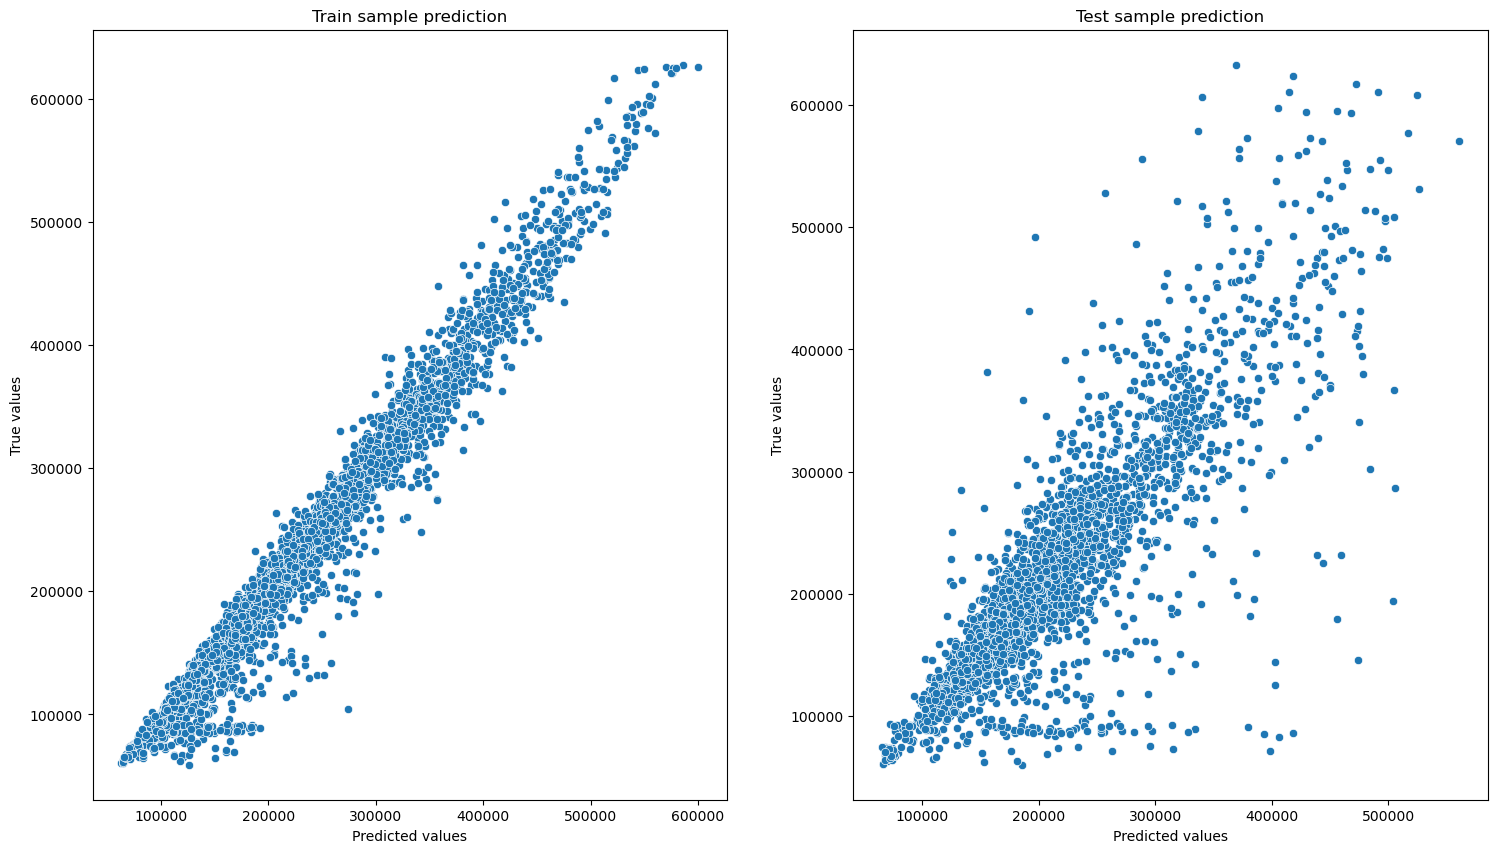

In [51]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [52]:
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))

In [53]:
cv_score.mean()

0.7378590221666349

In [54]:
test_df.shape

(5000, 30)

In [55]:
# submit = pd.read_csv('rf_submit.csv')
# submit.head()

In [56]:
predictions = rf_model.predict(test_df)
predictions

array([166682.15132586, 215827.95491545, 313138.86744829, ...,
       326467.70326337, 190658.12761426, 178252.93551902])

In [57]:
# submit.to_scv('rf_submit.csv', index=False)

c submit возникли сложности, но очень сильно не успеваю, поэтому не успела разобраться

In [58]:
with open('rf_final_model', 'wb') as file:
    pickle.dump(preprocessor, file)